## SelectKBest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_excel('dataset.xlsx')

# Handle `inf` and `-inf` values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna({
    col: data[col].max() if np.inf in data[col].values else data[col].min() for col in data.select_dtypes(include=[np.number])
}, inplace=True)

# Separate features and target
X = data.drop(columns=['target'])
y = data['target']

# Correlation-based filtering
correlation_matrix = X.corr()
threshold = 0.95  # Define your threshold for high correlation
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(abs(upper_triangle[column]) > threshold)]
X_filtered = X.drop(columns=to_drop)

# SelectKBest for univariate feature selection
selector = SelectKBest(score_func=f_classif, k='all')  # Use 'all' to get scores for all features
selector.fit(X_filtered, y)

# Get feature scores
scores = selector.scores_
features = X_filtered.columns

# Create a DataFrame for visualization
feature_scores = pd.DataFrame({
    'Feature': features,
    'Score': scores
}).sort_values(by='Score', ascending=False)




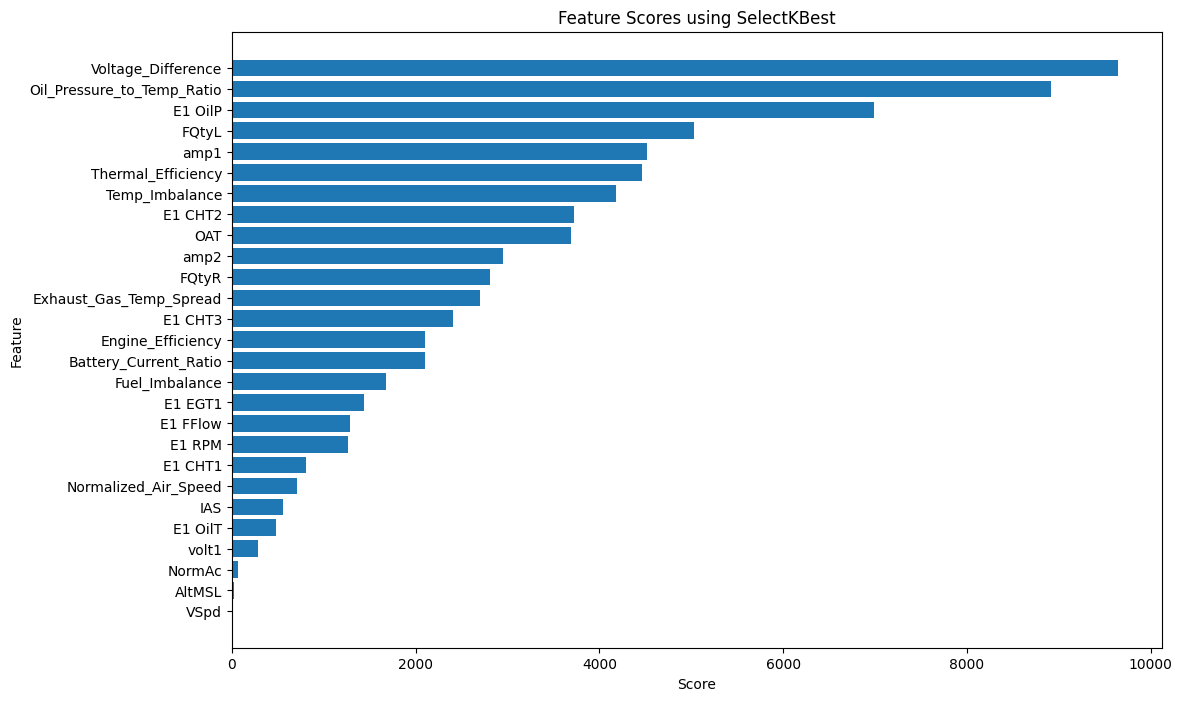

Top 10 selected features: ['Voltage_Difference' 'Oil_Pressure_to_Temp_Ratio' 'E1 OilP' 'FQtyL'
 'amp1' 'Thermal_Efficiency' 'Temp_Imbalance' 'E1 CHT2' 'OAT' 'amp2']


In [ ]:
# Plot the feature scores
plt.figure(figsize=(12, 8))
plt.barh(feature_scores['Feature'], feature_scores['Score'])
plt.gca().invert_yaxis()
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Scores using SelectKBest')
plt.show()

# Select top-k important features (e.g., top 10)
top_k = 10
selected_features = feature_scores['Feature'].head(top_k).values
print(f"Top {top_k} selected features:", selected_features)

## PCA

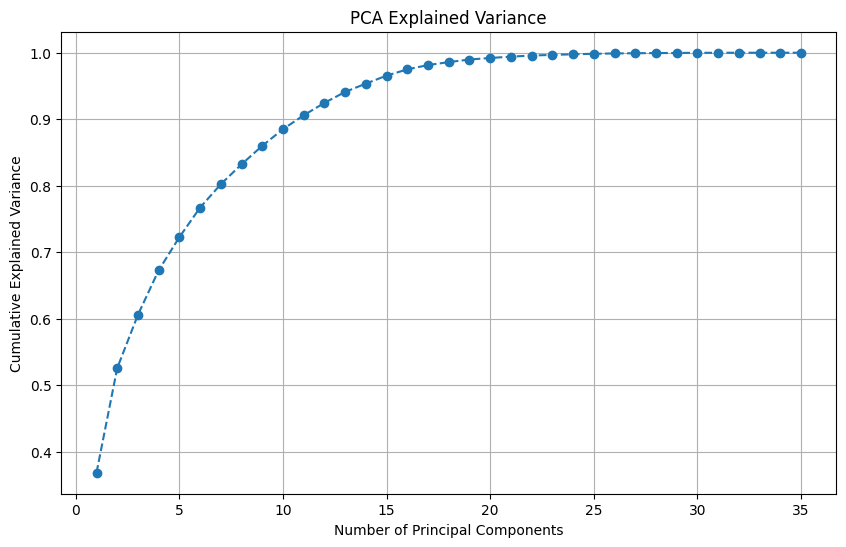

Number of components to retain for 95.0% explained variance: 14
Top features for each principal component:
PC1                     E1 EGT2
PC2                     E1 CHT2
PC3                       volt1
PC4                 Temp_Stress
PC5                        VSpd
PC6     Exhaust_Gas_Temp_Spread
PC7                        amp1
PC8     Exhaust_Gas_Temp_Spread
PC9                      NormAc
PC10                     NormAc
PC11             Fuel_Imbalance
PC12      Battery_Current_Ratio
PC13                       amp2
PC14      Battery_Current_Ratio
dtype: object


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()

# Determine the number of components to retain
threshold = 0.95  # Set the desired level of explained variance (e.g., 95%)
num_components = next(i for i, cumulative_var in enumerate(cumulative_variance) if cumulative_var >= threshold) + 1
print(f"Number of components to retain for {threshold * 100}% explained variance: {num_components}")

# Transform data using the optimal number of components
pca_optimal = PCA(n_components=num_components)
X_pca_optimal = pca_optimal.fit_transform(X_scaled)

# Get top features contributing to each principal component
components = pd.DataFrame(
    pca_optimal.components_,
    columns=X.columns
).transpose()
components.columns = [f'PC{i + 1}' for i in range(num_components)]

# Identify the most significant features for each component
top_features_per_component = components.abs().idxmax(axis=0)
print("Top features for each principal component:")
print(top_features_per_component)



## Random Forest

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

# Load your dataset
data = pd.read_excel('dataset.xlsx')

# Handle `inf` and `-inf` values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna({
    col: data[col].max() if np.inf in data[col].values else data[col].min() for col in data.select_dtypes(include=[np.number])
}, inplace=True)

# Separate features and target
X = data.drop(columns=['target'])
y = data['target']

# Train a Random Forest model for feature importance
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)



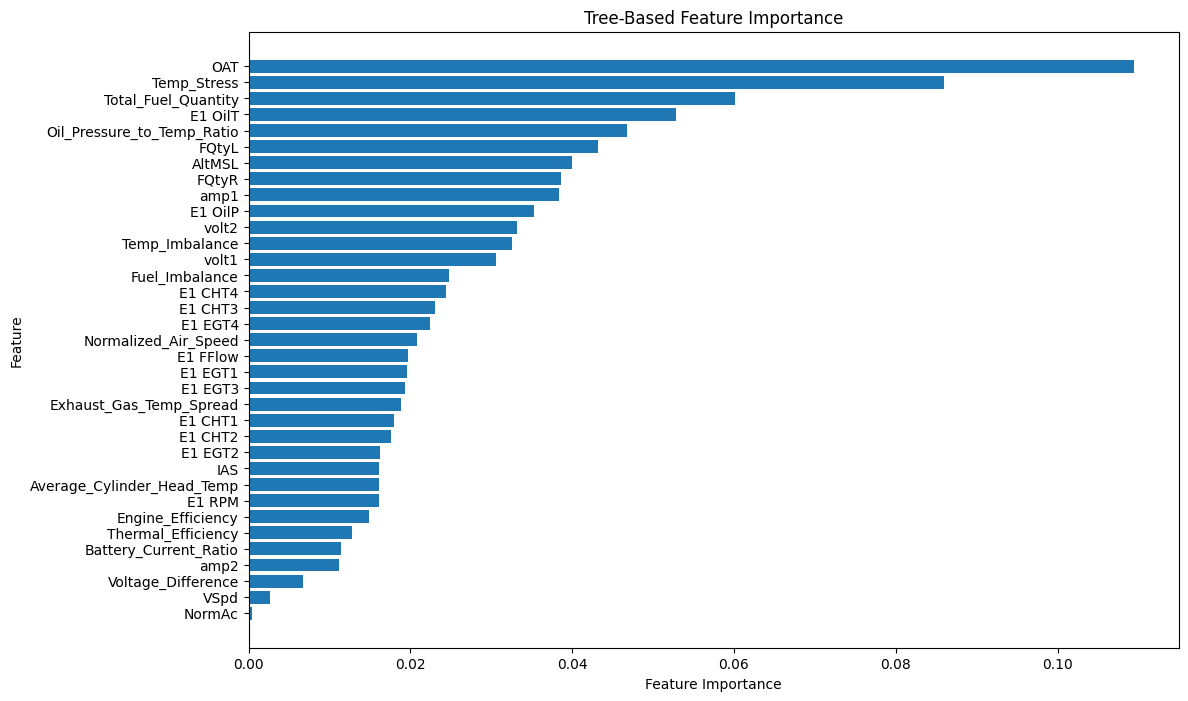

Top 10 selected features: ['OAT' 'Temp_Stress' 'Total_Fuel_Quantity' 'E1 OilT'
 'Oil_Pressure_to_Temp_Ratio' 'FQtyL' 'AltMSL' 'FQtyR' 'amp1' 'E1 OilP']


In [ ]:
# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Tree-Based Feature Importance")
plt.show()

# Select top-k important features (e.g., top 10)
top_k = 10
selected_features = importance_df['Feature'].head(top_k).values
print(f"Top {top_k} selected features:", selected_features)